# MAE 223 Final Exam
#### Rayne Milner

In [1]:
import numpy as np
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [1]:
q1, q2, q3 = me.dynamicsymbols('q1:4')
u1, u2, u3 = me.dynamicsymbols('u1:4')
t = me.dynamicsymbols._t

NameError: name 'me' is not defined

In [3]:
k, lA, lB, mA, mB, tB, wA, wB = sm.symbols('k, l_A, l_B, m_A, m_B, t_B, w_A, w_B')

In [4]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [5]:
A.orient(N, 'Axis', (q2, N.z))
B.orient(A, 'Axis', (q3, A.z))
A.set_ang_vel(N, u2*N.z)
B.set_ang_vel(A, u3*A.z)

In [6]:
PH = me.Point('PH')
PA = me.Point('PA')
PAo = me.Point('PAo')
PAR = me.Point('PAR')
PAL = me.Point('PAL')
PB = me.Point('PB')
PBo = me.Point('PBo')
PBR = me.Point('PBR')#PBR
PBL = me.Point('PBL')

In [7]:
vHx = me.dynamicsymbols('vHx')
vHy = me.dynamicsymbols('vHy')

In [8]:
PH.set_vel(N, (vHx*N.x + vHy*N.y))

In [9]:
pA = q1*N.y #connects PA to PH
pAo = (lA/2)*A.x #connects PAo to PA
pAR = lA*A.x + (wA/2)*-A.y #connects PAR to PA
pAL = lA*A.x + (wA/2)*A.y #connects PAL to PA
pB = lA*A.x #connects PA to PB
pBo = (lB/2)*B.x #connects PBo to PB
pBR = lB*B.x + (wB/2)*-B.y#connects PBR to PB
pBL = lB*B.x + (wB/2)*B.y #connects PBL to PB

PA.set_pos(PH, pA)
PAo.set_pos(PA, pAo)
PAR.set_pos(PA, pAR)
PAL.set_pos(PA, pAL)

PB.set_pos(PA, pB)
PBo.set_pos(PB, pBo)
PBR.set_pos(PB, pBR)
PBL.set_pos(PB, pBL)

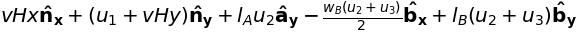

In [10]:
PA.set_vel(N, PH.vel(N) + u1*N.y)
PAo.v2pt_theory(PA, N, A)
PAL.v2pt_theory(PA, N, A)
PAR.v2pt_theory(PA, N, A)
PB.v2pt_theory(PA, N, A)
PBo.v2pt_theory(PB, N, B)
PBR.v2pt_theory(PB, N, B)
PBL.v2pt_theory(PB, N, B)

# a
Formulate velocities and angular velocities

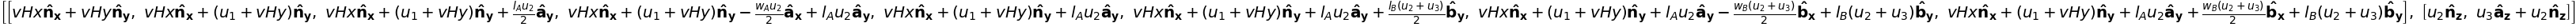

In [11]:
ang_vels = [A.ang_vel_in(N), B.ang_vel_in(N)]
vels = [
 PH.vel(N),
 PA.vel(N),
 PAo.vel(N),
 PAL.vel(N),
 PB.vel(N),
 PBo.vel(N),
 PBL.vel(N),
 PBR.vel(N)]

[vels, ang_vels]

# B
Introduce Motion Constraints

In [12]:
z1 = me.dot(PAL.vel(N),N.x)*sm.tan(q2) - me.dot(PAL.vel(N),N.y)
z3 = me.dot(PBR.vel(N),A.x)*sm.tan(q3) - me.dot(PBR.vel(N),A.y)

us = sm.solve([z1,z3], u2, u3, dict = True)

us

In [13]:
#This cell produces all the substitutions necessary to formulate final answers in terms of independent coordinates only
#I know system of equations is trivial, but subs is hard to deal with so I am doing it like this.

gs1 = sm.Eq(u1, q1.diff(t))
gs2 = sm.Eq(u2, q2.diff(t))
gs3 = sm.Eq(u3, q3.diff(t))
[gs1,gs2,gs3]

qdots = sm.solve([gs1, gs2, gs3], q1.diff(), q2.diff(), q3.diff(), dict = True)
udots = {ud.diff(t): v.diff(t) for ud, v in us[0].items()} # for later substitution

# C
Partial Velocities

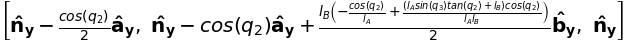

In [14]:
#Holonomic Partial Velocities
[[PAo.vel(N).diff(ur, N) for ur in [u1, u2, u3]],
[PBo.vel(N).diff(ur, N) for ur in [u1, u2, u3]]]
#NonHolonomic Partial Velocities
PVs = [(PAo.vel(N).subs({u2: (us[0][u2]), u3: (us[0][u3])})).diff(u1,N),
       (PBo.vel(N).subs({u2: (us[0][u2]), u3: (us[0][u3])})).diff(u1,N),
       (PA.vel(N).subs({u2: (us[0][u2]), u3: (us[0][u3])})).diff(u1,N)]
PVs

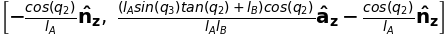

In [15]:
#Holnomic Partial Angular Velocites
[[A.ang_vel_in(N).diff(ur,N) for ur in [u1, u2, u3]],
[B.ang_vel_in(N).diff(ur,N) for ur in [u1, u2, u3]]]
#NonHolonomic Partial Velocities
PAVs = [(A.ang_vel_in(N).subs(udots).subs(us[0]).subs(qdots[0])).diff(u1,N),
        (B.ang_vel_in(N).subs(udots).subs(us[0]).subs(qdots[0])).diff(u1,N)]
PAVs

# D
Accelerations

In [16]:
alpha_A_N = A.ang_acc_in(N).simplify()
alpha_B_N = B.ang_acc_in(N).simplify()

ang_accs = [alpha_A_N, alpha_B_N]

ang_accs_subbed = [alpha_A_N.subs(udots).subs(us[0]).subs(qdots[0]),
                   alpha_B_N.subs(udots).subs(us[0]).subs(qdots[0])]
ang_accs

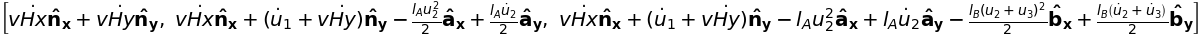

In [17]:
a_PH_N = PH.acc(N)
a_PAo_N = PAo.acc(N)
a_PBo_N = PBo.acc(N)

accs = [a_PH_N, a_PAo_N, a_PBo_N]

accs_subbed=[
 a_PH_N.subs(udots).subs(udots).subs(us[0]).subs(qdots[0]),
 a_PAo_N.subs(udots).subs(udots).subs(us[0]).subs(qdots[0]),
 a_PBo_N.subs(udots).subs(udots).subs(us[0]).subs(qdots[0])]

accs

# e 
Contributing Force and Torque Vectors

In [18]:
RA = k*q1*-N.y # applied at PA

# f 
Non-Holonomic Generalized Active Forces

In [19]:
Fr = PVs[2].dot(RA)

Fr

# g 
Central Inertia Dyadics

In [20]:
IAo = (1/12)*mA*(lA**2+wA**2)
IA = me.inertia(A, 0, 0, IAo)
IA

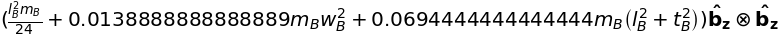

In [21]:
IBo = (1/12)*(5/6)*mB*(lB**2+tB**2)+((1/12)*(mB/6)*wB**2 + (mB/6)*(lB/2)**2) #inertia of the trailer + (inertia of rod + PAT term)
IB = me.inertia(B, 0, 0, IBo)
IB

# h
non-holonomic generalized inertia forces

In [22]:
Frstr = PVs[0].dot(-mA*accs_subbed[1])+PVs[0].dot(-mB*accs_subbed[2])+PAVs[0].dot(-ang_accs_subbed[0].dot(IA)+ang_vels[0].cross(IA.dot(ang_vels[0])))+PAVs[1].dot(-ang_accs_subbed[1].dot(IB)+ang_vels[1].cross(IB.dot(ang_vels[1])))

me.find_dynamicsymbols(Frstr)

# i
Formulate Kane's Equations

In [23]:
f = Fr + Frstr
f = f.subs(udots).subs(us[0]).subs(qdots[0])
me.find_dynamicsymbols(f)

In [24]:
f.free_symbols

In [25]:
u1_solved = sm.solve(f, u1.diff())

In [26]:
#u1_solved
#it lives

In [27]:
eval_u1 = sm.lambdify((k, lA, lB, mA, mB, tB, wA, wB, q1, q2, q3, u1, vHx, vHy, vHx.diff(t), vHy.diff(t)), u1_solved)

In [28]:
eval_u1(1000, 4.0, 6.0, 100, 75.0, 0.25, 0.75, 0.6, 0.005, ((3.14159265358979323846)/20), ((3.14159265358979323846)/30), 0.6, -15, 2, 0.02, 0.001)